<a href="https://colab.research.google.com/github/MohammadRaziei/Deep-Learning-Course/blob/master/HW03/Q7/HW03_Q7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 - Problem 7

## Preprocessing

In [1]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split


def plot_image(img, method=None):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)


## Part A

load data 
> I uploaded this dataset to my github repo to download easily!

In [2]:
!wget https://github.com/MohammadRaziei/DataSetsArchive/raw/master/sign_mnist.zip
!unzip -o sign_mnist -d sign_mnist 

--2020-12-11 22:56:44--  https://github.com/MohammadRaziei/DataSetsArchive/raw/master/sign_mnist.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MohammadRaziei/DataSetsArchive/master/sign_mnist.zip [following]
--2020-12-11 22:56:45--  https://raw.githubusercontent.com/MohammadRaziei/DataSetsArchive/master/sign_mnist.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65633206 (63M) [application/zip]
Saving to: ‘sign_mnist.zip.7’

sign_mnist.zip.7    100%[===================>]  62.59M   192MB/s    in 0.3s    

2020-12-11 22:56:45 (192 MB/s) - ‘sign_mnist.zip.7’ saved [65633206/65633206]

Archi

## Part B

In [3]:
class sign_mnist:
    label_set = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
    def load_data(root = 'sign_mnist', shape = (28,28)):
        filename_train = os.path.join(root,'sign_mnist_train.csv')
        csv_train = pd.read_csv(filename_train,sep=',')
        y_train = np.array(csv_train['label'], dtype=np.int32)
        x_train = np.array(csv_train.iloc[:,1:], dtype=np.float32)
        if shape is not None:
          x_train = x_train.reshape(-1,*shape)
        del csv_train
        filename_test = os.path.join(root,'sign_mnist_test.csv')
        csv_test = pd.read_csv(filename_test,sep=',')
        y_test = np.array(csv_test['label'], dtype=np.int32)
        x_test = np.array(csv_test.iloc[:,1:], dtype=np.float32)
        if shape is not None:
          x_test = x_test.reshape(-1,*shape)
        del csv_test
        return (x_train, y_train), (x_test, y_test)

    def interpret_label(label):
        if type(label) is int or type(label) is np.int32:
          return chr(ord('a')+ label) 
        if type(label) is np.ndarray:
          return np.array([chr(ord('a')+ int(i)) for i in label.squeeze().tolist()])
        return [chr(ord('a')+ i) for i in label]


# show table
pd.read_csv('sign_mnist/sign_mnist_train.csv', sep=',')

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93


In [4]:
(x_train, y_train), (x_test, y_test) = sign_mnist.load_data()
print('x_train.shape: ', x_train.shape, '  ,y_train.shape: ', y_train.shape)
print('x_test.shape:  ', x_test.shape, '   ,y_test.shape:  ', y_test.shape)
print('Data is loaded successfully :)')

x_train.shape:  (27455, 28, 28)   ,y_train.shape:  (27455,)
x_test.shape:   (7172, 28, 28)    ,y_test.shape:   (7172,)
Data is loaded successfully :)


## Part C

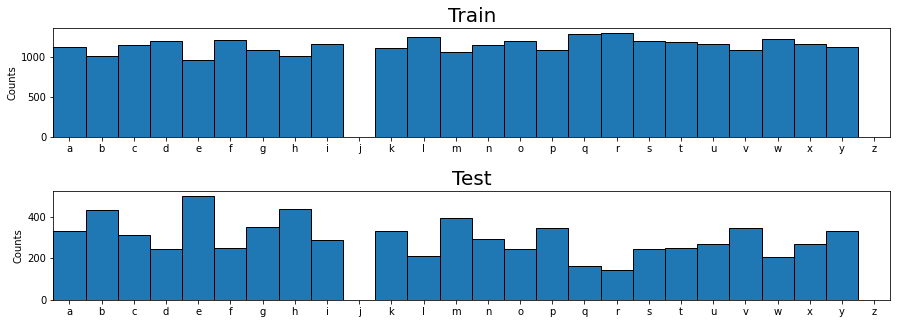

In [5]:
fig = plt.figure(figsize=(15,5))
# fig.tight_layout()
fig.subplots_adjust(hspace=0.5)

ax = plt.subplot(211)
plt.hist(y_train, density=False, bins=np.arange(26)-0.5, edgecolor='black')  # `density=False` would make counts
plt.ylabel('Counts')
plt.title('Train', fontdict={'fontsize':20})
plt.xticks(np.arange(26))
ax.set_xticklabels(sign_mnist.interpret_label(np.arange(26)), fontdict={'color':'black'})
ax.set_xlim(-0.5,25.5)

ax = plt.subplot(212)
plt.hist(y_test, density=False, bins=np.arange(26)-0.5, edgecolor='black')  # `density=False` would make counts
plt.ylabel('Counts')
plt.title('Test', fontdict={'fontsize':20})
plt.xticks(np.arange(26))
ax.set_xticklabels(sign_mnist.interpret_label(np.arange(26)), fontdict={'color':'black'})
ax.set_xlim(-0.5,25.5)

plt.show()

> train-set is more ballanced 

## Part D

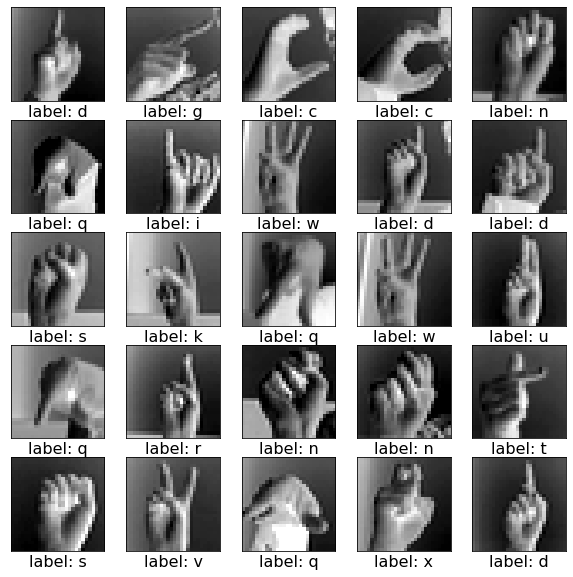

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plot_image(x_train[i])
    plt.xlabel('label: {}'.format(sign_mnist.interpret_label(y_train[i])), fontdict={'fontsize':16})
plt.show()


## Part E

In [7]:
x_subtrain, x_valid, y_subtrain, y_valid = train_test_split(x_train, y_train, test_size = 0.2) 
print('x_subtrain.shape: ', x_subtrain.shape, '  ,y_subtrain.shape: ', y_subtrain.shape)
print('x_valid.shape:    ', x_test.shape, '    ,y_valid.shape:   ', y_valid.shape)

x_subtrain.shape:  (21964, 28, 28)   ,y_subtrain.shape:  (21964,)
x_valid.shape:     (7172, 28, 28)     ,y_valid.shape:    (5491,)


Normalize:

In [8]:
X_subtrain = x_subtrain.reshape(*x_subtrain.shape,1) / 255.
X_valid = x_valid.reshape(*x_valid.shape,1) / 255.
X_test = x_test.reshape(*x_test.shape,1) / 255.

## Part F

One-hot transform labels


In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
onehotencoder = OneHotEncoder()
y_subtrain_onehot = onehotencoder.fit_transform(y_subtrain.reshape(-1, 1)).toarray()
y_valid_onehot = onehotencoder.transform(y_valid.reshape(-1, 1)).toarray()
y_test_onehot = onehotencoder.transform(y_test.reshape(-1, 1)).toarray()


In [10]:
y_subtrain_onehot[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0.])

In [14]:
y_subtrain_onehot.shape

(21964, 24)

## Part G

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, MeanSquaredError

Model: "Model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 26, 26, 16)        160       
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 13, 13, 16)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 11, 11, 32)        4640      
_________________________________________________________________
MaxPool2 (MaxPooling2D)      (None, 5, 5, 32)          0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 3, 3, 64)          18496     
_________________________________________________________________
MaxPool3 (MaxPooling2D)      (None, 1, 1, 64)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 64)                0    

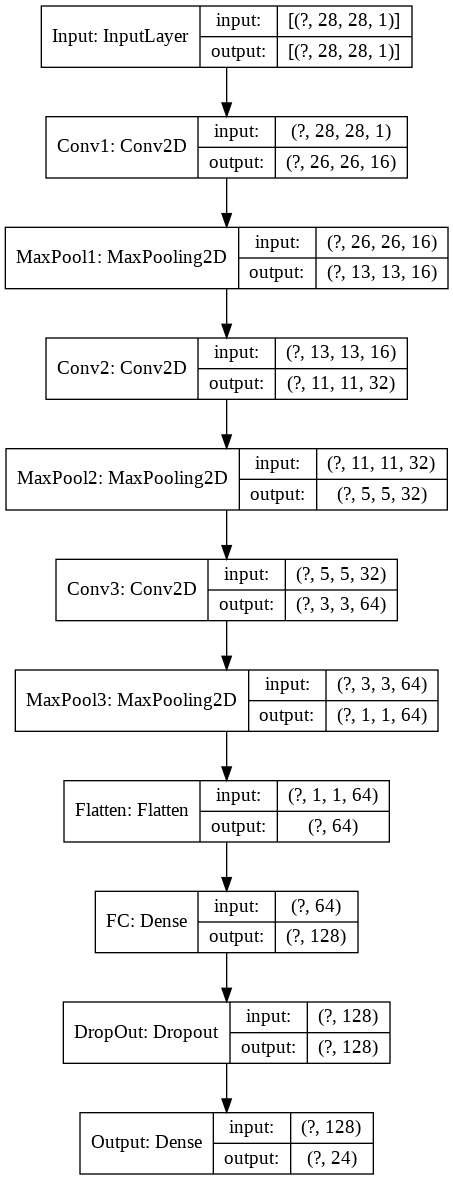

In [21]:
model = Sequential(
    [
     Input(shape=X_subtrain.shape[1:], name='Input'), # shape: (28,28,1)
     Conv2D(16, (3,3), activation='relu', name='Conv1'),
     MaxPooling2D((2,2), name='MaxPool1'),
     Conv2D(32, (3,3), activation='relu', name='Conv2'),
     MaxPooling2D((2,2), name='MaxPool2'),     
     Conv2D(64, (3,3), activation='relu', name='Conv3'),
     MaxPooling2D((2,2), name='MaxPool3'),
     Flatten(name='Flatten'),
     Dense(128, activation='relu', name='FC'),
     Dropout(0.2, name='DropOut'),
     Dense(24, activation='softmax', name='Output')
    ]
, name='Model2')

model.summary()
keras.utils.plot_model(model,'model.png', show_shapes=True)

## Part H

In [ ]:
model.compile(optimizer='adam', loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [24]:
history = model.fit(X_subtrain,
                    y_subtrain_onehot,
                    epochs=20,
                    verbose=2,
                    validation_data=(X_valid, y_valid_onehot),
                    batch_size=128
                    )

Epoch 1/20
172/172 - 1s - loss: 0.7010 - accuracy: 0.7655 - val_loss: 0.5318 - val_accuracy: 0.8310
Epoch 2/20
172/172 - 1s - loss: 0.5143 - accuracy: 0.8282 - val_loss: 0.3824 - val_accuracy: 0.8771
Epoch 3/20
172/172 - 1s - loss: 0.3813 - accuracy: 0.8751 - val_loss: 0.2807 - val_accuracy: 0.9126
Epoch 4/20
172/172 - 1s - loss: 0.2925 - accuracy: 0.9050 - val_loss: 0.1774 - val_accuracy: 0.9512
Epoch 5/20
172/172 - 1s - loss: 0.2133 - accuracy: 0.9323 - val_loss: 0.1571 - val_accuracy: 0.9537
Epoch 6/20
172/172 - 1s - loss: 0.1693 - accuracy: 0.9478 - val_loss: 0.0911 - val_accuracy: 0.9845
Epoch 7/20
172/172 - 1s - loss: 0.1335 - accuracy: 0.9588 - val_loss: 0.0731 - val_accuracy: 0.9840
Epoch 8/20
172/172 - 1s - loss: 0.1064 - accuracy: 0.9698 - val_loss: 0.0508 - val_accuracy: 0.9931
Epoch 9/20
172/172 - 1s - loss: 0.0881 - accuracy: 0.9755 - val_loss: 0.0375 - val_accuracy: 0.9938
Epoch 10/20
172/172 - 1s - loss: 0.0653 - accuracy: 0.9822 - val_loss: 0.0320 - val_accuracy: 0.9947

## Part I

#####  Plot Loss

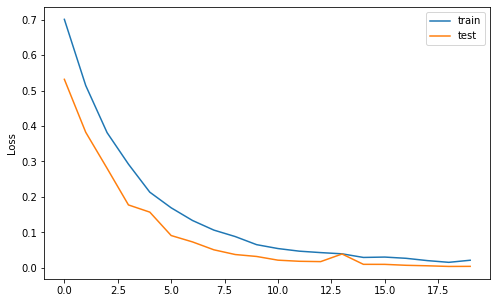

In [27]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plot Accuracy

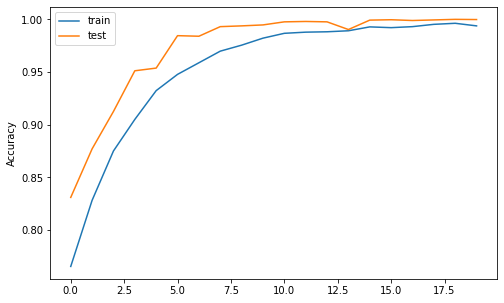

In [31]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])